# Classification Using Logistic Regression

# Concept Session

# Demo 3.1: Data Preparation

#The constant term in regression analysis is the value at which the regression line crosses the y-axis.


### Import Data & Python Packages

In [ ]:
#first we have to import all relevant python packages 
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# mount the drive


In [ ]:
# Read CSV train data file into DataFrame
data_df1=pd.read_csv('/content/DS2_C5_S3_HR_Data_Practice.csv')

data_df=data_df1

# preview the data


In [ ]:
data_df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# checking for null values
print(data_df.isnull().sum())


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


## 1. Data Exploration and Visualization - Understanding the data

In [ ]:
#getting to know column names
print(data_df.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [ ]:
print(data_df.dtypes)

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object


In [ ]:
# 
# Converting object data types into categorical column
data_df['salary']=data_df['salary'].astype('category')
data_df['Department']=data_df['Department'].astype('category')

In [ ]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()

data_df['salary_encode']= label_encoder.fit_transform(data_df['salary'])
data_df['salary_encode'].unique()

data_df['Department_encode']= label_encoder.fit_transform(data_df['Department'])
data_df['Department_encode'].unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

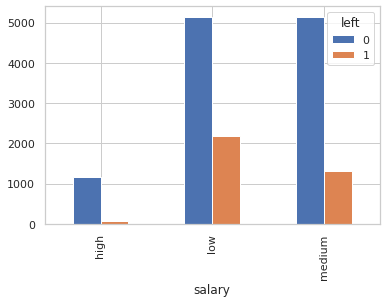

In [ ]:
# analyzing the impact of salary in employee retention
pd.crosstab(data_df['salary'],data_df['left']).plot(kind='bar')

 Inference: HIgher the salary, the retention rate is lower
#They are inversely proportional to one another

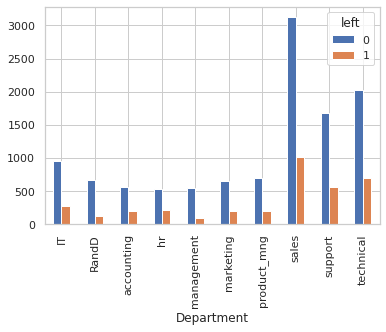

In [ ]:
# departmentwise employee retention rate
# visualizing rention rate department wise
pd.crosstab(data_df['Department'],data_df['left']).plot(kind='bar')

## 2. Data Preprocessing 

### Data quality | Missing Value Assessment

In [ ]:
# check missing values in data
print(data_df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
salary_encode            0
Department_encode        0
dtype: int64


In [ ]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
 numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
 new_data_df = data_df.select_dtypes(include=numerics)
 if scale == 'minmax':
     scaler = MinMaxScaler()
 else:
     scaler = StandardScaler()
 df_scaled = pd.DataFrame(scaler.fit_transform(new_data_df.to_numpy()),columns=new_data_df.columns)
 return df_scaled

In [ ]:
# scaling the data using MinMax Scaling process
scale = 'minmax' 
data_df_scaled=feature_scale(scale)
data_df_scaled
data_df=data_df_scaled

### Data quality  | Detect correlations

In [ ]:
# finding correlation
cor=data_df.corr()
cor

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_encode,Department_encode
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.011754,0.003153
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.013965,0.007772
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009672,0.009268
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.007082,0.003913
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.003086,-0.018010
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.002506,0.003425
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.001294,0.032105
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.001318,-0.027336
salary_encode,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,1.000000,0.000685
Department_encode,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,0.000685,1.000000


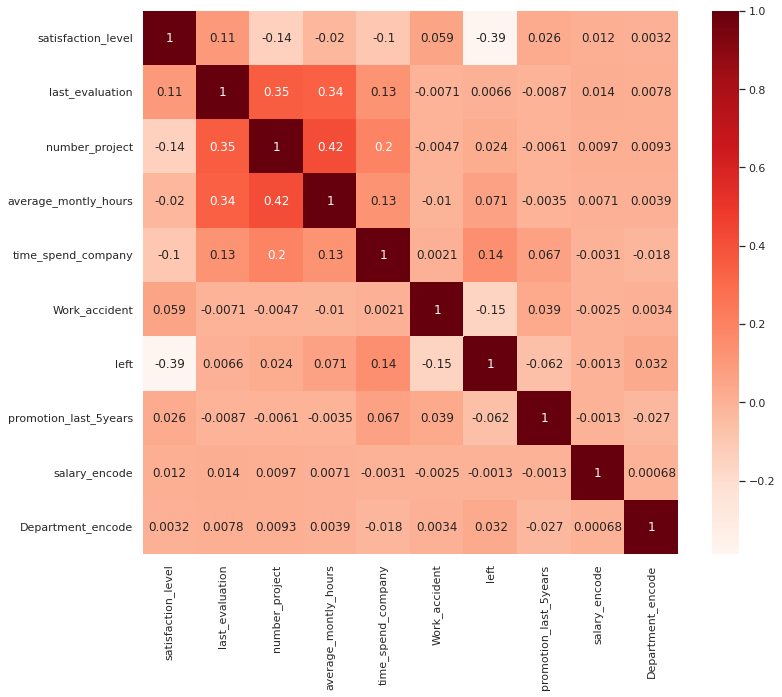

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Preparation of data

## Demo 3: Logistic Regression 

### 1. Preparation of training and test dataset

In [ ]:
#Creating test and training datasets

# moving the target variable to first or last in dataset


X= data_df[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years', 'Department_encode', 'salary_encode']]
y=data_df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)
print('Size of training dataset: ', X_train.shape)
print('Size of test dataset: ', X_test.shape)

Size of training dataset:  (10499, 9)
Size of test dataset:  (4500, 9)


In [ ]:
#training the data using logistic regression

logreg = LogisticRegression()
result=logreg.fit(X_train, y_train)

# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = logreg.predict(X_test)

#Calculating the accuracy of the training dataset
train_acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print('Training accuracy is',train_acc_log)

Training accuracy is 76.96


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10490
Method:                           MLE   Df Model:                            8
Date:                Tue, 05 Jul 2022   Pseudo R-squ.:                  0.1849
Time:                        06:45:05   Log-Likelihood:                -4670.7
converged:                       True   LL-Null:                       -5730.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level       -3.6261      0.097    -37.272      0.000      -3.817      -3.435
last_evaluation           0.5335      0.109      4.877      0.000       0.319       0.748
number_project           -1.5562      0.125    -12.494      0.000      -1.800      -1.312
average_montly_hours      0.9723      0.123      7.911      0.000       0.731       1.213
time_spend_company        1.9231      0.141     13.662      0.000       1.647       2.199
Work_accident            -1.5127      0.106    -14.323      0.000      -1.720      -1.306
promotion_last_5years    -1.8107      0.307     -5.902      0.000      -2.412      -1.209
Department_encode         0.3277      0.072      4.531      0.000       0.186       0.469
salary_encode             0.0440      0.072      0.609      0.543      -0.098       0.186
=========================================================================================
"""

In [ ]:
# evalate the model on the test data
print('Test accuracy is',logreg.score(X_test, y_test))

Test accuracy is 0.7655555555555555


In [ ]:
#understanding model statistics
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.444876
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.185    
Dependent Variable:   left               AIC:                9359.4987
Date:                 2022-07-05 05:52   BIC:                9424.8301
No. Observations:     10499              Log-Likelihood:     -4670.7  
Df Model:             8                  LL-Null:            -5730.1  
Df Residuals:         10490              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       7.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
satisfaction_level    -3.6261   0.0973 -37.2720 0.0000 -3.8167 -3.4354
las

In [ ]:
# indicates the correlation of each feature
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Coeff"] = pd.Series(logreg.coef_[0])
#coeff_df.sort_values(by='Coeff', ascending=False)
coeff_df


,Feature,Coeff
0,last_evaluation,-3.596554
1,number_project,0.504466
2,average_montly_hours,-1.504908
3,time_spend_company,0.927110
4,Work_accident,1.857819
5,promotion_last_5years,-1.493698
6,Department_encode,-1.656375
7,salary_encode,0.302241


In [ ]:
logreg.intercept_

array([0.05378688])

In [ ]:

coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Coeff"] = pd.Series(logreg.coef_[0])
#coeff_df.sort_values(by='Coeff', ascending=False)
coeff_df

,Feature,Coeff
0,satisfaction_level,-3.596554
1,last_evaluation,0.504466
2,number_project,-1.504908
3,average_montly_hours,0.927110
4,time_spend_company,1.857819
5,Work_accident,-1.493698
6,promotion_last_5years,-1.656375
7,Department_encode,0.302241
8,salary_encode,0.020796


Factors affecting employee retention can be analyzed by finding the correlation of features


In [ ]:
#Correlation with output variable
cor_target = abs(cor["left"])
print(cor_target)




satisfaction_level       0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident            0.154622
left                     1.000000
promotion_last_5years    0.061788
salary_encode            0.001294
Department_encode        0.032105
Name: left, dtype: float64


All the varaibles have correlation value < 0.5 with output variable
Hence a threshold of 0.2 is set for feature selection


In [ ]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.02]
print(relevant_features)

satisfaction_level       0.388375
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident            0.154622
left                     1.000000
promotion_last_5years    0.061788
Department_encode        0.032105
Name: left, dtype: float64


The relevant features shown above contribute to the classification of the target variable 

## Demo 4: Model Evaluation

### 1. Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
cnf_matrix=metrics.confusion_matrix(y_test, Y_pred)
cnf_matrix
#print(confusion_matrix(y_test,Y_pred))
#tn, fp, fn, tp = confusion_matrix(y_test,Y_pred).ravel()
#print(tn, fp, fn, tp)

array([[3153,  248],
       [ 807,  292]])

Visualizing COnfusion matrix

Text(0.5, 257.44, 'Predicted label')

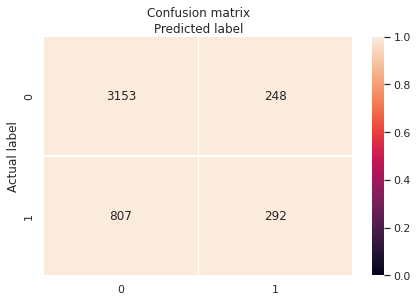

In [ ]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#plt.figure(figsize=(6,4))
ax=sns.heatmap(cnf_matrix, annot=True,fmt='d',linewidths=.5,vmin=0, vmax=1)
#sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, fmt='.2%', cmap='Blues')
#make_confusion_matrix(cnf_matrix_2x2, figsize=(8,6), cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


The labels goes by the matrix index
i--> actual
j-->predicted

00 --> TN
01--> FP
10 --> FN
11 --> TP


#Performance measures

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('accuracy:', accuracy_score(y_test, Y_pred))
print('recall:', recall_score(y_test, Y_pred))
print('f1-score:', f1_score(y_test, Y_pred))
print('precision:', precision_score(y_test, Y_pred))

accuracy: 0.7655555555555555
recall: 0.2656960873521383
f1-score: 0.3563148261134838
precision: 0.5407407407407407


### 2. ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
roc

0.8187681779618958

In [ ]:
# calculate roc curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, Y_pred)
# calculate AUC
auc = roc_auc_score(y_test, Y_pred)
print('AUC: %.3f' % auc)
# calculate AUC


AUC: 0.596


AUC score for the case is 0.596. 
AUC score 1 represents perfect classifier
AUC score >0.5 represents a decent classifier

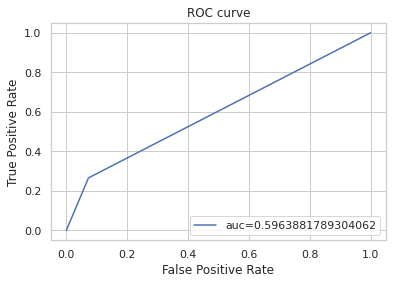

In [ ]:
#plotting ROC curve

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=4)
plt.title('ROC curve')
plt.show()